# Bias in Adult Income Dataset
## Group 2

**Course:** DATA 6550 – Data Bias  
**Dataset:** [Adult Income Dataset - UCI](https://archive.ics.uci.edu/ml/datasets/adult)


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [44]:
df = pd.read_csv("adult.csv")

print(df.head())
print(df.info())


   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [45]:
df.columns = df.columns.str.strip()


In [46]:
df = df.replace("?", np.nan)
df = df.dropna()


In [47]:
df["income"] = df["income"].apply(lambda x: 1 if ">50K" in x else 0)


In [48]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())


['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [49]:
print(df["gender"].value_counts(normalize=True))



gender
Male      0.675048
Female    0.324952
Name: proportion, dtype: float64


In [50]:
print(df["race"].value_counts(normalize=True))


race
White                 0.860267
Black                 0.093494
Asian-Pac-Islander    0.028813
Amer-Indian-Eskimo    0.009619
Other                 0.007806
Name: proportion, dtype: float64


In [51]:
gender_income = df.groupby("gender")["income"].mean()
print(gender_income)


gender
Female    0.113576
Male      0.312477
Name: income, dtype: float64


In [52]:
race_income = df.groupby("race")["income"].mean()
print(race_income)


race
Amer-Indian-Eskimo    0.121839
Asian-Pac-Islander    0.283193
Black                 0.126301
Other                 0.127479
White                 0.262371
Name: income, dtype: float64


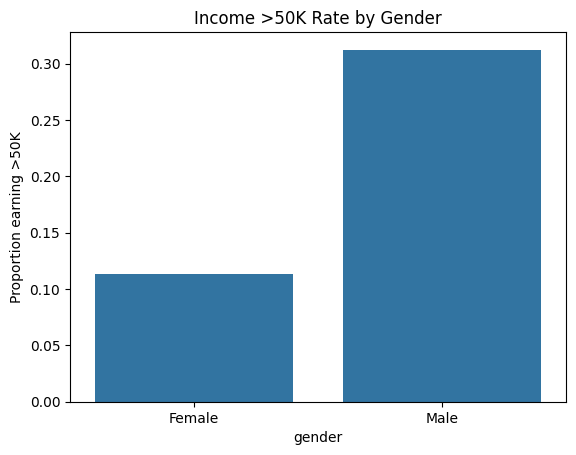

In [53]:
sns.barplot(x=gender_income.index, y=gender_income.values)
plt.title("Income >50K Rate by Gender")
plt.ylabel("Proportion earning >50K")
plt.show()


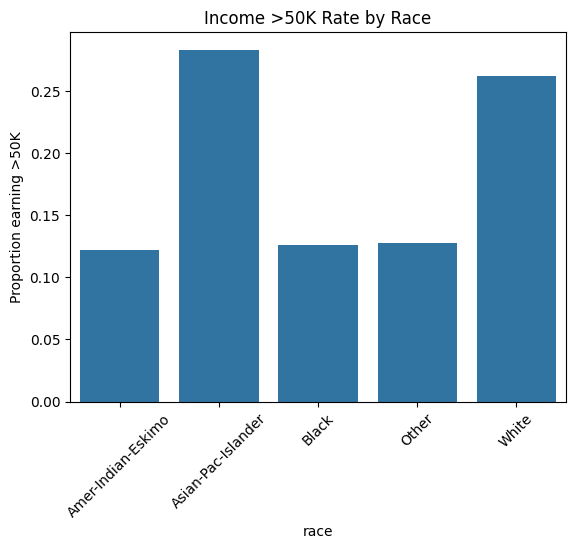

In [54]:
sns.barplot(x=race_income.index, y=race_income.values)
plt.xticks(rotation=45)
plt.title("Income >50K Rate by Race")
plt.ylabel("Proportion earning >50K")
plt.show()


In [56]:
print("rows:", len(df))
print("income dtype:", df["income"].dtype)
print("income unique:", df["income"].unique()[:10])
print("income missing:", df["income"].isna().sum())
print("gender_label unique:", df["gender_label"].unique()[:10])

rows: 45222
income dtype: int64
income unique: [0 1]
income missing: 0
gender_label unique: [nan]


In [57]:
if df["income"].dtype == "object":
    df["income_bin"] = df["income"].astype(str).str.strip().map({ "<=50K": 0, ">50K": 1 })
else:
    df["income_bin"] = df["income"].astype(int)


In [58]:
df["gender_label"] = df["gender"].map({0: "Female", 1: "Male"}) if df["gender"].dtype != "object" else df["gender"]


In [59]:
print(df["income_bin"].value_counts(dropna=False))
print(df["gender_label"].value_counts(dropna=False))



income_bin
0    34014
1    11208
Name: count, dtype: int64
gender_label
Male      30527
Female    14695
Name: count, dtype: int64


In [60]:
print(df["income_bin"].value_counts(dropna=False))
print(df["gender_label"].value_counts(dropna=False))


income_bin
0    34014
1    11208
Name: count, dtype: int64
gender_label
Male      30527
Female    14695
Name: count, dtype: int64


In [61]:
print(df["income_bin"].value_counts(dropna=False))
print(df["gender_label"].value_counts(dropna=False))


income_bin
0    34014
1    11208
Name: count, dtype: int64
gender_label
Male      30527
Female    14695
Name: count, dtype: int64


In [62]:
gender_income_counts = pd.crosstab(
    df["gender_label"],
    df["income_bin"],
    normalize="index"
)

gender_income_counts = gender_income_counts.reindex(columns=[0, 1], fill_value=0)

gender_income_counts.columns = ["<=50K", ">50K"]
print(gender_income_counts)


                 <=50K      >50K
gender_label                    
Female        0.886424  0.113576
Male          0.687523  0.312477


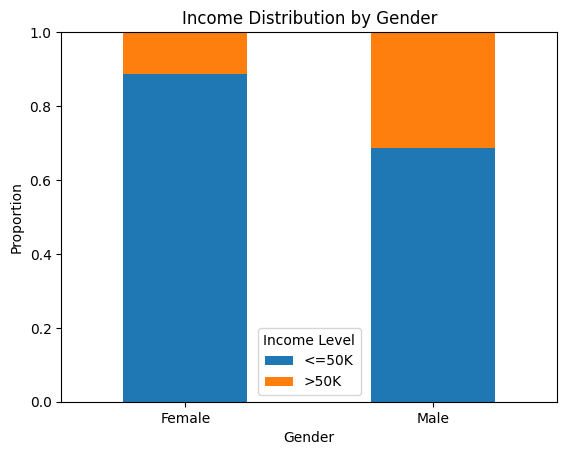

In [63]:
import matplotlib.pyplot as plt

ax = gender_income_counts.plot(kind="bar", stacked=True)
plt.title("Income Distribution by Gender")
plt.ylabel("Proportion")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title="Income Level")
plt.ylim(0, 1)
plt.show()


In [64]:
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])


In [65]:
X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [66]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix



In [67]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC()
}

In [68]:
results = []

for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Attach predictions
    temp = X_test.copy()
    temp["actual"] = y_test
    temp["predicted"] = y_pred
    
    # Demographic Parity
    gender_pred_rate = temp.groupby("gender")["predicted"].mean()
    dp_diff = abs(gender_pred_rate[1] - gender_pred_rate[0])
    
    # Equal Opportunity (TPR)
    tpr = {}
    for g in [0, 1]:
        subset = temp[temp["gender"] == g]
        tn, fp, fn, tp = confusion_matrix(
            subset["actual"], subset["predicted"]
        ).ravel()
        tpr[g] = tp / (tp + fn)
    
    tpr_diff = abs(tpr[1] - tpr[0])
    
    results.append([name, accuracy, dp_diff, tpr_diff])



/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
import pandas as pd

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Demographic Parity Diff", "TPR Diff"]
)

print(results_df)

                 Model  Accuracy  Demographic Parity Diff  TPR Diff
0  Logistic Regression  0.851699                 0.202772  0.414447
1        Decision Tree  1.000000                 0.196134  0.000000
2        Random Forest  1.000000                 0.196134  0.000000
3                  SVM  0.792732                 0.023875  0.048056


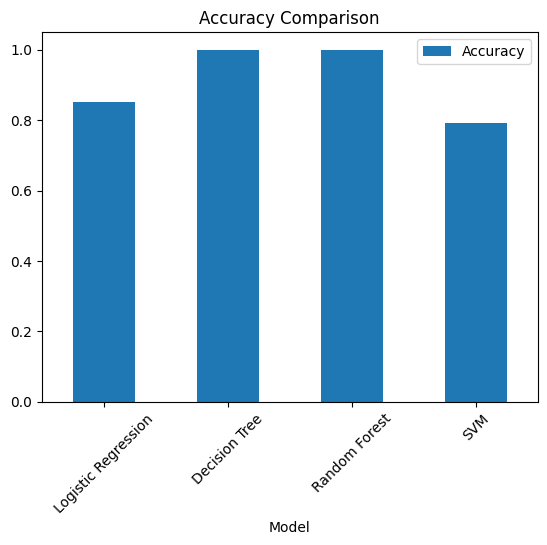

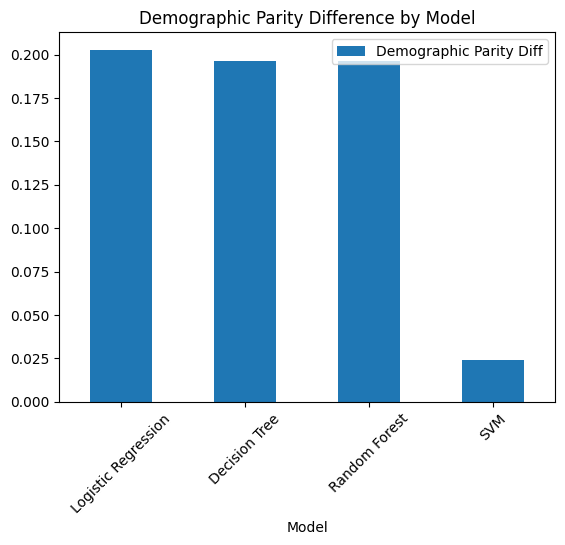

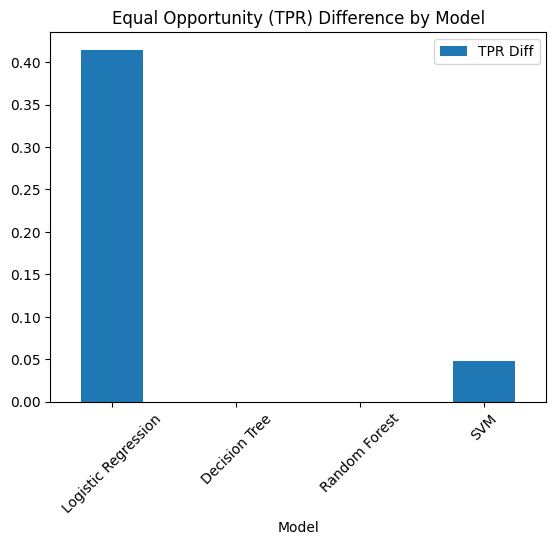

In [70]:
results_df.plot(x="Model", y="Accuracy", kind="bar")
plt.title("Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()




results_df.plot(x="Model", y="Demographic Parity Diff", kind="bar")
plt.title("Demographic Parity Difference by Model")
plt.xticks(rotation=45)
plt.show()



results_df.plot(x="Model", y="TPR Diff", kind="bar")
plt.title("Equal Opportunity (TPR) Difference by Model")
plt.xticks(rotation=45)
plt.show()
